In [1]:
!pip install wordcloud

In [3]:
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gheva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gheva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gheva\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:

file="C:/Users/gheva/OneDrive/Desktop/blogs.csv"

df = pd.read_csv(file,encoding='latin')

In [7]:
df

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93817,And make her infamous in story.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93818,When such a tempest shook the land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93819,"How could unguarded virtue stand ?""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93820,- Jonathan Swift (1732),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

df.rename(columns={'v1':'class','v2':'text'},inplace=True)

In [11]:
df

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93817,And make her infamous in story.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93818,When such a tempest shook the land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93819,"How could unguarded virtue stand ?""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93820,- Jonathan Swift (1732),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [15]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
93817,And make her infamous in story.,NaN
93818,When such a tempest shook the land,NaN
93819,"How could unguarded virtue stand ?""""",NaN
93820,- Jonathan Swift (1732),NaN


In [17]:

df['Data'].value_counts()

Data
>                                                                                                                     996
                                                                                                                      547
--                                                                                                                    478
>                                                                                                                     418
\t                                                                                                                    220
                                                                                                                     ... 
Message-ID: <1993Apr16.171211.5772@colorado.edu>                                                                        1
Nntp-Posting-Host: fred.colorado.edu                                                                                    1
References: <bethdC

In [19]:
df['label']=df['Labels'].map({'alt.atheism':1,'comp.graphics':0})

In [21]:
df

,Data,Labels,label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
93817,And make her infamous in story.,NaN,NaN
93818,When such a tempest shook the land,NaN,NaN
93819,"How could unguarded virtue stand ?""""",NaN,NaN
93820,- Jonathan Swift (1732),NaN,NaN


In [23]:
df['length']=df['Data'].astype(str).apply(len)

In [25]:
df

,Data,Labels,label,length
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0,3264
...,...,...,...,...
93817,And make her infamous in story.,NaN,NaN,31
93818,When such a tempest shook the land,NaN,NaN,34
93819,"How could unguarded virtue stand ?""""",NaN,NaN,36
93820,- Jonathan Swift (1732),NaN,NaN,23


In [ ]:

df.hist(column='length',by='Labels')

In [29]:
atheism = df[df['label']==1]
graphics = df[df['label']==0]

In [31]:
atheism

,Data,Labels,label,length
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0,3264
...,...,...,...,...
91800,Newsgroups: talk.abortion,alt.atheism,1.0,25
92788,Newsgroups: talk.abortion,alt.atheism,1.0,25
93272,Newsgroups: talk.abortion,alt.atheism,1.0,25
93325,Newsgroups: alt.conspiracy,alt.atheism,1.0,26


In [33]:
graphics

,Data,Labels,label,length
100,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,comp.graphics,0.0,1123
101,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,comp.graphics,0.0,1385
102,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,comp.graphics,0.0,1317
103,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.graphics,0.0,764
104,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.graphics,0.0,979
105,Xref: cantaloupe.srv.cs.cmu.edu comp.arch.stor...,comp.graphics,0.0,1064
106,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.graphics,0.0,1644
107,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,comp.graphics,0.0,5114
108,Xref: cantaloupe.srv.cs.cmu.edu alt.binaries.p...,comp.graphics,0.0,1430
109,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,comp.graphics,0.0,5108


In [39]:
def wordcld(data,title): 
  txt = ' '.join(data['Data']) 
  txt = txt.lower() 
  stop = STOPWORDS 

  wc = WordCloud(background_color='white').generate(txt)
  plt.imshow(wc)
  plt.axis('off')
  plt.title(title)
  

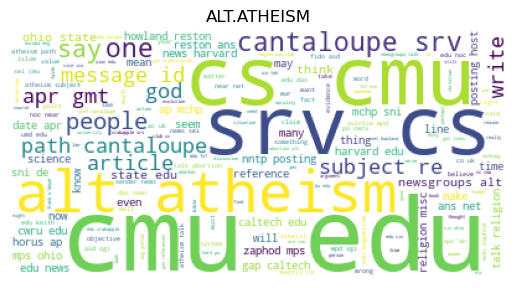

In [41]:

wordcld(atheism,'ALT.ATHEISM')

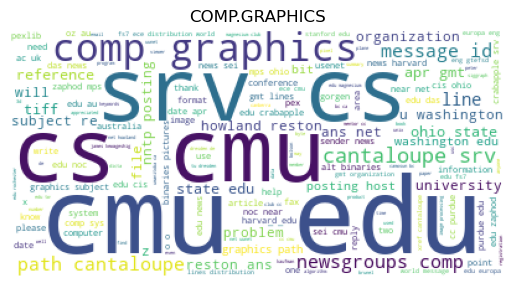

In [43]:

wordcld(graphics,'COMP.GRAPHICS')

In [45]:

lemma = WordNetLemmatizer()

In [47]:
df['Data'][0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [49]:

range(len(df))

range(0, 93822)

In [51]:

corpus = []

for i in range(len(df)):
  msg = re.sub('[^a-zA-Z]',' ',df['Data'][i]) 
  msg = msg.lower() 
  msg = msg.split() 

  
  msg = [lemma.lemmatize(i) for i in msg if not i in stopwords.words('english')] 
  msg = ' '.join(msg) 
  corpus.append(msg)

TypeError: expected string or bytes-like object, got 'float'

In [ ]:
corpus

##Model Building##

In [ ]:
df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus)
x = pd.DataFrame(x.toarray(),columns=tf.get_feature_names_out())
x
     

In [ ]:

cv = CountVectorizer()

x =  cv.fit_transform(corpus)
x = pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
x

In [ ]:

y = df['label'] # ham - 0, spam - 1
y

In [ ]:

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:

nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print('Train Accuracy:',nb.score(xtrain,ytrain)) 
print('Test Accuracy:',nb.score(xtest,ytest))